<a href="https://colab.research.google.com/github/sachinreddygithub/Google-Data-Analytics-Capstone-Complete-a-Case-Study/blob/main/Bella_case_study_with_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction
Title: **Bellabeat Case Study**

Author: Maurine Nyongesa

Date: 11 April 2023  
## Contents
1. [Ask](#1.-Ask)  
2. [Prepare](#2.-Prepare)  
3. [Process](#3.-Process)  
4. [Analyze](#4.-Analyze)  
5. [Share](#5.-Share)  
6. [Act](#6.-Act)    


## Scenario
I am a junior data analyst working on the marketing analyst team at Bellabeat, a high-tech manufacturer of health-focused products for women. Bellabeat is a successful small company, but they have the potential to become a larger player in the global smart device market.  

Urška Sršen, cofounder and Chief Creative Officer of Bellabeat, believes that analyzing smart device fitness data could help unlock new growth opportunities for the company.  

I have been asked to focus on one of Bellabeat’s products and analyze smart device data to gain insight into how consumers are using their smart devices. The insights I discover will then help guide marketing strategy for the company. I will present your analysis to the Bellabeat executive team along with your high-level recommendations for Bellabeat’s marketing strategy.

## Characters and products  

### Characters  
* **Urška Sršen:** Bellabeat’s cofounder and Chief Creative Officer  
* **Sando Mur:** Mathematician and Bellabeat’s cofounder; key member of the Bellabeat executive team    
* **Bellabeat marketing analytics team:** A team of data analysts responsible for collecting, analyzing, and
reporting data that helps guide Bellabeat’s marketing strategy. I joined this team six months ago and have been busy learning about Bellabeat’’s mission and business goals — as well as how you, as a junior data analyst, can help Bellabeat achieve them.  

####  Products
*  **Bellabeat app:** The Bellabeat app provides users with health data related to their activity, sleep, stress,
menstrual cycle, and mindfulness habits. This data can help users better understand their current habits and
make healthy decisions. The Bellabeat app connects to their line of smart wellness products.  

*  **Leaf:** Bellabeat’s classic wellness tracker can be worn as a bracelet, necklace, or clip. The Leaf tracker connects
to the Bellabeat app to track activity, sleep, and stress.  
 
*  **Time:** This wellness watch combines the timeless look of a classic timepiece with smart technology to track user
activity, sleep, and stress. The Time watch connects to the Bellabeat app to provide you with insights into your
daily wellness.  

*  **Spring:** This is a water bottle that tracks daily water intake using smart technology to ensure that you are
appropriately hydrated throughout the day. The Spring bottle connects to the Bellabeat app to track your
hydration levels.  

*  **Bellabeat membership:** Bellabeat also offers a subscription-based membership program for users.
Membership gives users 24/7 access to fully personalized guidance on nutrition, activity, sleep, health and
beauty, and mindfulness based on their lifestyle and goals.

 ## 1. Ask   
The stake holder wants me to analyze smart device usage data in order to gain insight into how consumers use non-Bellabeat smart
devices. She then wants me to select one Bellabeat product to apply these insights to my your presentation.  
   
**Guiding Questions**  

1.  What are some trends in smart device usage?  

2.  How could these trends apply to Bellabeat customers?  

3.  How could these trends help influence Bellabeat marketing strategy?

## 2. Prepare
Sršen encouraged me to use public data that explores smart device users' daily habits. 
*  FitBit Fitness Tracker Data (CC0: Public Domain, dataset made available through Mobius): This Kaggle data set
contains personal fitness tracker from thirty fitbit users. Thirty eligible Fitbit users consented to the submission of
personal tracker data, including minute-level output for physical activity, heart rate, and sleep monitoring.It includes information about daily activity, steps, and heart rate that can be used to explore users’ habits.
This data set might have some limitations, and hence I considered adding another data to help
address those limitations as I begin to work more with this data.  

According to [click here](https://www.everydayhealth.com/weight/how-to-achieve-one-pound-of-weight-loss.aspx#:~:text=According%20to%20the%20Dietary%20Guidelines,man%20expends%202%2C000%20to%203%2C000.) age, activity level, body size, and body composition all influence how many calories a person burns throughout each day, therefore the analysis of the data involving calories would be biased.  
                          
According to the article [click here](https://www.mayoclinic.org/healthy-lifestyle/adult-health/expert-answers/how-many-hours-of-sleep-are-enough/faq-20057898) sleep is affected by factors such as sleep quality, pregnancy and age. Provided our data does not specify a specific age group it's hard to make an analysis on the effect of sleep.  
                           
Daily steps are also affected by some factors such as occupation, sex, height and stride and age according to [click here](https://www.verywellfit.com/whats-typical-for-average-daily-steps-3435736).This is to prove that the data provided is not enough for deep analysis since not much information is provided about the participants  
                           
Hence I'll just base most of the work on the data cleaning process.

In [376]:
#loading the necessary python tools
import numpy as np
import pandas as pd
import datetime as dt # date time

In [377]:
#Importing the csv dataset
daily_activity = pd.read_csv('/content/dailyActivity_merged.csv')
daily_activity.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


## 3. Process
### Data Cleaning process
This step involves finding duplicates in both rows and columns, missing data,finding unique values etc. and solving the errors. 

In [378]:
# Renaming columns from XXX to X_X_X
daily_activity.rename(columns = {"Id":"id", "ActivityDate":"date","TotalSteps":"total_steps", "TotalDistance":"total_dist", "TrackerDistance":"track_dist", "LoggedActivitiesDistance":"logged_dist", "VeryActiveDistance":"very_active_dist", "ModeratelyActiveDistance":"moderate_active_dist", "LightActiveDistance":"light_active_dist", "SedentaryActiveDistance":"sedentary_active_dist", "VeryActiveMinutes":"very_active_mins", "FairlyActiveMinutes":"fairly_active_mins", "LightlyActiveMinutes":"lightly_active_mins", "SedentaryMinutes":"sedentary_mins", "TotalExerciseMinutes":"total_mins","TotalExerciseHours":"total_hours","Calories":"calories"}, inplace = True)

In [379]:
# count distinct value of "Id"
unique_id = len(pd.unique(daily_activity["id"]))
  
print(unique_id)

33


In [380]:
#Converting from object to datetime
daily_activity['date'] = daily_activity['date'].astype('datetime64[ns]')

In [381]:
#New column for the days of the week
daily_activity["day_of_the_Week"] = daily_activity["date"].dt.day_name()
daily_activity.head()

,id,date,total_steps,total_dist,track_dist,logged_dist,very_active_dist,moderate_active_dist,light_active_dist,sedentary_active_dist,very_active_mins,fairly_active_mins,lightly_active_mins,sedentary_mins,calories,day_of_the_Week
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,Tuesday
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,Wednesday
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776,Thursday
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,Friday
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,Saturday


In [382]:
#finding the datatypes
print(daily_activity.dtypes)

id                                int64
date                     datetime64[ns]
total_steps                       int64
total_dist                      float64
track_dist                      float64
logged_dist                     float64
very_active_dist                float64
moderate_active_dist            float64
light_active_dist               float64
sedentary_active_dist           float64
very_active_mins                  int64
fairly_active_mins                int64
lightly_active_mins               int64
sedentary_mins                    int64
calories                          int64
day_of_the_Week                  object
dtype: object


In [383]:
# create new column "total_mins" containing sum of total minutes.
daily_activity["total_mins"] = daily_activity["very_active_mins"] + daily_activity["fairly_active_mins"] + daily_activity["lightly_active_mins"] + daily_activity["sedentary_mins"]
daily_activity["total_mins"].head(10)

0    1094
1    1033
2    1440
3     998
4    1040
5     761
6    1440
7    1120
8    1063
9    1076
Name: total_mins, dtype: int64

In [384]:
# create new column *total_hours* by converting to hour and round float to two decimal places
daily_activity["total_hours"] = round(daily_activity["total_mins"] / 60)

# use head() to print 1st 10 rows to confirm
daily_activity["total_hours"].head(10)

0    18.0
1    17.0
2    24.0
3    17.0
4    17.0
5    13.0
6    24.0
7    19.0
8    18.0
9    18.0
Name: total_hours, dtype: float64

In [385]:
daily_activity['comb_tot_distance'] = daily_activity['logged_dist'] + daily_activity['very_active_dist'] + daily_activity['moderate_active_dist'] + daily_activity['light_active_dist'] + daily_activity['sedentary_active_dist']
daily_activity['comb_tot_distance'].head(10)

0    8.49
1    6.97
2    6.75
3    6.23
4    8.16
5    6.48
6    8.60
7    9.88
8    6.68
9    6.34
Name: comb_tot_distance, dtype: float64

In [386]:
#checking for null values
daily_activity.isnull().sum()

id                       0
date                     0
total_steps              0
total_dist               0
track_dist               0
logged_dist              0
very_active_dist         0
moderate_active_dist     0
light_active_dist        0
sedentary_active_dist    0
very_active_mins         0
fairly_active_mins       0
lightly_active_mins      0
sedentary_mins           0
calories                 0
day_of_the_Week          0
total_mins               0
total_hours              0
comb_tot_distance        0
dtype: int64

In [387]:
#Checking for duplicates
daily_activity.duplicated().sum()

0

In [388]:
#Identifying duplicated rows
daily_activity.loc[daily_activity.duplicated(), :]

,id,date,total_steps,total_dist,track_dist,logged_dist,very_active_dist,moderate_active_dist,light_active_dist,sedentary_active_dist,very_active_mins,fairly_active_mins,lightly_active_mins,sedentary_mins,calories,day_of_the_Week,total_mins,total_hours,comb_tot_distance


In [389]:
# Creating a new dataframe with only the columns I want to use
df_activity = pd.DataFrame(daily_activity, columns=['id','date', 'total_dist','total_steps','total_hours','total_mins','calories','day_of_the_Week'])
df_activity.head(5)
                           

,id,date,total_dist,total_steps,total_hours,total_mins,calories,day_of_the_Week
0,1503960366,2016-04-12,8.50,13162,18.0,1094,1985,Tuesday
1,1503960366,2016-04-13,6.97,10735,17.0,1033,1797,Wednesday
2,1503960366,2016-04-14,6.74,10460,24.0,1440,1776,Thursday
3,1503960366,2016-04-15,6.28,9762,17.0,998,1745,Friday
4,1503960366,2016-04-16,8.16,12669,17.0,1040,1863,Saturday


In [390]:
# Creating a new dataframe with only the columns I want to use
df_dist = pd.DataFrame(daily_activity, columns=['id','total_dist','track_dist','comb_tot_distance','calories'])
df_dist.head(10)

,id,total_dist,track_dist,comb_tot_distance,calories
0,1503960366,8.50,8.50,8.49,1985
1,1503960366,6.97,6.97,6.97,1797
2,1503960366,6.74,6.74,6.75,1776
3,1503960366,6.28,6.28,6.23,1745
4,1503960366,8.16,8.16,8.16,1863
5,1503960366,6.48,6.48,6.48,1728
6,1503960366,8.59,8.59,8.60,1921
7,1503960366,9.88,9.88,9.88,2035
8,1503960366,6.68,6.68,6.68,1786
9,1503960366,6.34,6.34,6.34,1775


In [391]:
daily_calories= pd.read_csv('/content/dailyCalories_merged.csv')
daily_calories.head()

,Id,ActivityDay,Calories
0,1503960366,4/12/2016,1985
1,1503960366,4/13/2016,1797
2,1503960366,4/14/2016,1776
3,1503960366,4/15/2016,1745
4,1503960366,4/16/2016,1863


In [392]:
# count distinct value of "Id"
unique_id = len(pd.unique(daily_calories["Id"]))
  
print(unique_id)

33


In [393]:
#Renaming columns from XXX to X_X_X
daily_calories.rename(columns = {"Id":"id","ActivityDay":"date","Calories":"calories"}, inplace = True)

In [394]:
#finding the datatypes
print(daily_calories.dtypes)

id           int64
date        object
calories     int64
dtype: object


In [395]:
#Converting from object to datetime
daily_calories['date'] = daily_calories['date'].astype('datetime64[ns]')

In [396]:
#New column for the days of the week
daily_calories["day_of_the_Week"] = daily_calories["date"].dt.day_name()
daily_calories.head()

,id,date,calories,day_of_the_Week
0,1503960366,2016-04-12,1985,Tuesday
1,1503960366,2016-04-13,1797,Wednesday
2,1503960366,2016-04-14,1776,Thursday
3,1503960366,2016-04-15,1745,Friday
4,1503960366,2016-04-16,1863,Saturday


In [397]:
daily_calories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               940 non-null    int64         
 1   date             940 non-null    datetime64[ns]
 2   calories         940 non-null    int64         
 3   day_of_the_Week  940 non-null    object        
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 29.5+ KB


In [398]:
#checking for null values
daily_calories.isnull().sum()

id                 0
date               0
calories           0
day_of_the_Week    0
dtype: int64

In [399]:
#Checking for duplicates
daily_calories.duplicated().sum()

0

In [400]:
#Identifying duplicated rows
daily_calories.loc[daily_calories.duplicated(), :]

,id,date,calories,day_of_the_Week


In [401]:
daily_intensities = pd.read_csv('/content/dailyIntensities_merged.csv')
#Changing the datatype
daily_intensities['ActivityDay'] = pd.to_datetime(daily_intensities['ActivityDay'])

#New column for the days of the week
daily_intensities["day_of_the_Week"] = daily_intensities["ActivityDay"].dt.day_name()
daily_intensities.head()

,Id,ActivityDay,SedentaryMinutes,LightlyActiveMinutes,FairlyActiveMinutes,VeryActiveMinutes,SedentaryActiveDistance,LightActiveDistance,ModeratelyActiveDistance,VeryActiveDistance,day_of_the_Week
0,1503960366,2016-04-12,728,328,13,25,0.0,6.06,0.55,1.88,Tuesday
1,1503960366,2016-04-13,776,217,19,21,0.0,4.71,0.69,1.57,Wednesday
2,1503960366,2016-04-14,1218,181,11,30,0.0,3.91,0.40,2.44,Thursday
3,1503960366,2016-04-15,726,209,34,29,0.0,2.83,1.26,2.14,Friday
4,1503960366,2016-04-16,773,221,10,36,0.0,5.04,0.41,2.71,Saturday


In [402]:
# count distinct value of "Id"
unique_id = len(pd.unique(daily_intensities["Id"]))
  
print(unique_id)

33


In [403]:
daily_intensities.rename(columns = {"Id":"id","ActivityDay":"date","VeryActiveDistance":"very_active_dist", "ModeratelyActiveDistance":"moderate_active_dist", "LightActiveDistance":"light_active_dist", "SedentaryActiveDistance":"sedentary_active_dist", "VeryActiveMinutes":"very_active_mins", "FairlyActiveMinutes":"fairly_active_mins", "LightlyActiveMinutes":"lightly_active_mins", "SedentaryMinutes":"sedentary_mins"}, inplace = True)

In [404]:
print(daily_intensities.dtypes)

id                                int64
date                     datetime64[ns]
sedentary_mins                    int64
lightly_active_mins               int64
fairly_active_mins                int64
very_active_mins                  int64
sedentary_active_dist           float64
light_active_dist               float64
moderate_active_dist            float64
very_active_dist                float64
day_of_the_Week                  object
dtype: object


In [405]:
daily_intensities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     940 non-null    int64         
 1   date                   940 non-null    datetime64[ns]
 2   sedentary_mins         940 non-null    int64         
 3   lightly_active_mins    940 non-null    int64         
 4   fairly_active_mins     940 non-null    int64         
 5   very_active_mins       940 non-null    int64         
 6   sedentary_active_dist  940 non-null    float64       
 7   light_active_dist      940 non-null    float64       
 8   moderate_active_dist   940 non-null    float64       
 9   very_active_dist       940 non-null    float64       
 10  day_of_the_Week        940 non-null    object        
dtypes: datetime64[ns](1), float64(4), int64(5), object(1)
memory usage: 80.9+ KB


In [406]:
#Checking for null values
daily_intensities.isnull().sum()

id                       0
date                     0
sedentary_mins           0
lightly_active_mins      0
fairly_active_mins       0
very_active_mins         0
sedentary_active_dist    0
light_active_dist        0
moderate_active_dist     0
very_active_dist         0
day_of_the_Week          0
dtype: int64

In [407]:
#Checking for duplicates
daily_intensities.duplicated().sum()

0

In [408]:
#Identifying duplicated rows
daily_intensities.loc[daily_intensities.duplicated(), :]

,id,date,sedentary_mins,lightly_active_mins,fairly_active_mins,very_active_mins,sedentary_active_dist,light_active_dist,moderate_active_dist,very_active_dist,day_of_the_Week


In [409]:
# create a new column "total_mins" containing sum of total minutes.
daily_intensities["total_mins"] = daily_intensities["very_active_mins"] + daily_intensities["fairly_active_mins"] + daily_intensities["lightly_active_mins"] + daily_intensities["sedentary_mins"]
daily_intensities["total_mins"].head(5)

0    1094
1    1033
2    1440
3     998
4    1040
Name: total_mins, dtype: int64

In [410]:
# create a new column "total_dist" containing sum of total distances.
daily_intensities["total_dist"] = daily_intensities["sedentary_active_dist"] + daily_intensities["light_active_dist"] + daily_intensities["moderate_active_dist"] + daily_intensities["very_active_dist"]
daily_intensities["total_dist"].head(10)

0    8.49
1    6.97
2    6.75
3    6.23
4    8.16
5    6.48
6    8.60
7    9.88
8    6.68
9    6.34
Name: total_dist, dtype: float64

In [411]:
# Creating a new dataframe with only the columns I want to use
df_intensities = pd.DataFrame(daily_intensities, columns=['id','date','total_mins','total_dist','day_of_the_Week'])
df_intensities.head(5)
                           

,id,date,total_mins,total_dist,day_of_the_Week
0,1503960366,2016-04-12,1094,8.49,Tuesday
1,1503960366,2016-04-13,1033,6.97,Wednesday
2,1503960366,2016-04-14,1440,6.75,Thursday
3,1503960366,2016-04-15,998,6.23,Friday
4,1503960366,2016-04-16,1040,8.16,Saturday


In [412]:
daily_steps = pd.read_csv('/content/dailySteps_merged.csv')

#Converting from object to datetime
daily_steps['ActivityDay'] = pd.to_datetime(daily_steps['ActivityDay'])

#New column for the days of the week
daily_steps["day_of_the_Week"] = daily_steps["ActivityDay"].dt.day_name()
daily_steps.head()

,Id,ActivityDay,StepTotal,day_of_the_Week
0,1503960366,2016-04-12,13162,Tuesday
1,1503960366,2016-04-13,10735,Wednesday
2,1503960366,2016-04-14,10460,Thursday
3,1503960366,2016-04-15,9762,Friday
4,1503960366,2016-04-16,12669,Saturday


In [413]:
# count distinct value of "Id"
unique_id = len(pd.unique(daily_steps["Id"]))
  
print(unique_id)

33


In [414]:
daily_steps.rename(columns = {"Id":"id","ActivityDay":"date","StepTotal":"total_steps"}, inplace = True)

In [415]:
print(daily_steps.dtypes)

id                          int64
date               datetime64[ns]
total_steps                 int64
day_of_the_Week            object
dtype: object


In [416]:
daily_steps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               940 non-null    int64         
 1   date             940 non-null    datetime64[ns]
 2   total_steps      940 non-null    int64         
 3   day_of_the_Week  940 non-null    object        
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 29.5+ KB


In [417]:
#Checking for null values
daily_steps.isnull().sum()

id                 0
date               0
total_steps        0
day_of_the_Week    0
dtype: int64

In [418]:
#Checking for duplicates
daily_steps.duplicated().sum()

0

In [419]:
#Identifying duplicated rows
daily_steps.loc[daily_steps.duplicated(), :]

,id,date,total_steps,day_of_the_Week


In [420]:
hourly_calories = pd.read_csv('/content/hourlyCalories_merged.csv')

#Splitting date and time into different columns
hourly_calories['Dates']= pd.to_datetime(hourly_calories['ActivityHour']).dt.date
hourly_calories['Time'] = pd.to_datetime(hourly_calories['ActivityHour']).dt.time

#Converting from object to datetime
hourly_calories['ActivityHour'] = pd.to_datetime(hourly_calories['ActivityHour'])

#New column for the days of the week
hourly_calories["day_of_the_Week"] = hourly_calories["ActivityHour"].dt.day_name()
hourly_calories.head()

,Id,ActivityHour,Calories,Dates,Time,day_of_the_Week
0,1503960366,2016-04-12 00:00:00,81,2016-04-12,00:00:00,Tuesday
1,1503960366,2016-04-12 01:00:00,61,2016-04-12,01:00:00,Tuesday
2,1503960366,2016-04-12 02:00:00,59,2016-04-12,02:00:00,Tuesday
3,1503960366,2016-04-12 03:00:00,47,2016-04-12,03:00:00,Tuesday
4,1503960366,2016-04-12 04:00:00,48,2016-04-12,04:00:00,Tuesday


In [421]:
# count distinct value of "Id"
unique_id = len(pd.unique(hourly_calories["Id"]))
  
print(unique_id)

33


In [422]:
hourly_calories.rename(columns = {"Id":"id","ActivityHour":"act_hr","Calories":"calories","Dates":"date","Time":"time"}, inplace = True)

In [423]:
print(hourly_calories.dtypes)

id                          int64
act_hr             datetime64[ns]
calories                    int64
date                       object
time                       object
day_of_the_Week            object
dtype: object


In [424]:
#Checking for null values
hourly_calories.isnull().sum()

id                 0
act_hr             0
calories           0
date               0
time               0
day_of_the_Week    0
dtype: int64

In [425]:
#Checking for duplicates
hourly_calories.duplicated().sum()

0

In [426]:
#Identifying duplicated rows
hourly_calories.loc[hourly_calories.duplicated(), :]

,id,act_hr,calories,date,time,day_of_the_Week


In [427]:
hr_calories = pd.DataFrame(hourly_calories, columns = ['id','calories','date','day_of_the_Week','time'])
hr_calories.head(10)

,id,calories,date,day_of_the_Week,time
0,1503960366,81,2016-04-12,Tuesday,00:00:00
1,1503960366,61,2016-04-12,Tuesday,01:00:00
2,1503960366,59,2016-04-12,Tuesday,02:00:00
3,1503960366,47,2016-04-12,Tuesday,03:00:00
4,1503960366,48,2016-04-12,Tuesday,04:00:00
5,1503960366,48,2016-04-12,Tuesday,05:00:00
6,1503960366,48,2016-04-12,Tuesday,06:00:00
7,1503960366,47,2016-04-12,Tuesday,07:00:00
8,1503960366,68,2016-04-12,Tuesday,08:00:00
9,1503960366,141,2016-04-12,Tuesday,09:00:00


In [428]:
hourly_intensities = pd.read_csv('/content/hourlyIntensities_merged.csv')

#Splitting Date and Time
hourly_intensities['Dates']= pd.to_datetime(hourly_intensities['ActivityHour']).dt.date
hourly_intensities['Time'] = pd.to_datetime(hourly_intensities['ActivityHour']).dt.time

#Converting from object to datetime
hourly_intensities['ActivityHour'] = pd.to_datetime(hourly_intensities['ActivityHour'])

#New column for the days of the week
hourly_intensities["day_of_the_Week"] = hourly_intensities["ActivityHour"].dt.day_name()
hourly_intensities.head()

hourly_intensities.head()

,Id,ActivityHour,TotalIntensity,AverageIntensity,Dates,Time,day_of_the_Week
0,1503960366,2016-04-12 00:00:00,20,0.333333,2016-04-12,00:00:00,Tuesday
1,1503960366,2016-04-12 01:00:00,8,0.133333,2016-04-12,01:00:00,Tuesday
2,1503960366,2016-04-12 02:00:00,7,0.116667,2016-04-12,02:00:00,Tuesday
3,1503960366,2016-04-12 03:00:00,0,0.000000,2016-04-12,03:00:00,Tuesday
4,1503960366,2016-04-12 04:00:00,0,0.000000,2016-04-12,04:00:00,Tuesday


In [429]:
# count distinct value of "Id"
unique_id = len(pd.unique(hourly_intensities["Id"]))
  
print(unique_id)

33


In [430]:
hourly_intensities.rename(columns = {"Id":"id","ActivityHour":"act_hour","TotalIntensity":"tot_intensity","AverageIntensity":"avg_int","Dates":"date","Time":"time"}, inplace = True)

In [431]:
print(hourly_intensities.dtypes)

id                          int64
act_hour           datetime64[ns]
tot_intensity               int64
avg_int                   float64
date                       object
time                       object
day_of_the_Week            object
dtype: object


In [432]:
#Checking for null values
hourly_intensities.isnull().sum()

id                 0
act_hour           0
tot_intensity      0
avg_int            0
date               0
time               0
day_of_the_Week    0
dtype: int64

In [433]:
#Checking for duplicates
hourly_intensities.duplicated().sum()

0

In [434]:
#Identifying duplicated rows
hourly_intensities.loc[hourly_intensities.duplicated(), :]

,id,act_hour,tot_intensity,avg_int,date,time,day_of_the_Week


In [435]:
hr_intensities = pd.DataFrame(hourly_intensities, columns=['id','tot_intensity','avg_int','date','time','day_of_the_Week'])
hr_intensities.head(5)

,id,tot_intensity,avg_int,date,time,day_of_the_Week
0,1503960366,20,0.333333,2016-04-12,00:00:00,Tuesday
1,1503960366,8,0.133333,2016-04-12,01:00:00,Tuesday
2,1503960366,7,0.116667,2016-04-12,02:00:00,Tuesday
3,1503960366,0,0.000000,2016-04-12,03:00:00,Tuesday
4,1503960366,0,0.000000,2016-04-12,04:00:00,Tuesday


In [436]:
hourly_steps = pd.read_csv('/content/hourlySteps_merged.csv')

#Splitting Date and Time from ActivityHour
hourly_steps['Dates']= pd.to_datetime(hourly_steps['ActivityHour']).dt.date
hourly_steps['Time'] = pd.to_datetime(hourly_steps['ActivityHour']).dt.time

#Converting the datatype object to datettime
hourly_steps['ActivityHour'] = pd.to_datetime(hourly_steps['ActivityHour'])

#New column for the days of the week
hourly_steps["day_of_the_Week"] = hourly_steps["ActivityHour"].dt.day_name()
hourly_steps.head()

,Id,ActivityHour,StepTotal,Dates,Time,day_of_the_Week
0,1503960366,2016-04-12 00:00:00,373,2016-04-12,00:00:00,Tuesday
1,1503960366,2016-04-12 01:00:00,160,2016-04-12,01:00:00,Tuesday
2,1503960366,2016-04-12 02:00:00,151,2016-04-12,02:00:00,Tuesday
3,1503960366,2016-04-12 03:00:00,0,2016-04-12,03:00:00,Tuesday
4,1503960366,2016-04-12 04:00:00,0,2016-04-12,04:00:00,Tuesday


In [437]:
# count distinct value of "Id"
unique_id = len(pd.unique(hourly_steps["Id"]))
  
print(unique_id)

33


In [438]:
#Chenging the column names
hourly_steps.rename(columns = {"Id":"id","ActivityHour":"act_hr","StepTotal":"total_steps","Dates":"date","Time":"time"}, inplace=True)

In [439]:
print(hourly_steps.dtypes)

id                          int64
act_hr             datetime64[ns]
total_steps                 int64
date                       object
time                       object
day_of_the_Week            object
dtype: object


In [440]:
#Checking for null values
hourly_steps.isnull().sum()

id                 0
act_hr             0
total_steps        0
date               0
time               0
day_of_the_Week    0
dtype: int64

In [441]:
#Checking for duplicates
hourly_steps.duplicated().sum()

0

In [442]:
#Identifying duplicated rows
hourly_steps.loc[hourly_steps.duplicated(), :]

,id,act_hr,total_steps,date,time,day_of_the_Week


In [443]:
#New dataframe 
hr_steps = pd.DataFrame(hourly_steps, columns=['id','total_steps','date','time','day_of_the_Week'])
hr_steps.head(5)

,id,total_steps,date,time,day_of_the_Week
0,1503960366,373,2016-04-12,00:00:00,Tuesday
1,1503960366,160,2016-04-12,01:00:00,Tuesday
2,1503960366,151,2016-04-12,02:00:00,Tuesday
3,1503960366,0,2016-04-12,03:00:00,Tuesday
4,1503960366,0,2016-04-12,04:00:00,Tuesday


In [444]:
min_cal_wide = pd.read_csv('/content/minuteCaloriesWide_merged.csv')
#Separating date and time from ActivityHour
min_cal_wide['Dates']= pd.to_datetime(min_cal_wide['ActivityHour']).dt.date
min_cal_wide['Time'] = pd.to_datetime(min_cal_wide['ActivityHour']).dt.time

#converting object to datetime
min_cal_wide['ActivityHour'] = pd.to_datetime(min_cal_wide['ActivityHour'])

#New column for the days of the week
min_cal_wide["day_of_the_Week"] = min_cal_wide["ActivityHour"].dt.day_name()
min_cal_wide.head()

,Id,ActivityHour,Calories00,Calories01,Calories02,Calories03,Calories04,Calories05,Calories06,Calories07,...,Calories53,Calories54,Calories55,Calories56,Calories57,Calories58,Calories59,Dates,Time,day_of_the_Week
0,1503960366,2016-04-13 00:00:00,1.8876,2.2022,0.9438,0.9438,0.9438,2.0449,0.9438,2.2022,...,0.9438,2.3595,1.8876,0.9438,0.9438,0.9438,0.9438,2016-04-13,00:00:00,Wednesday
1,1503960366,2016-04-13 01:00:00,0.7865,0.7865,0.7865,0.7865,0.9438,0.9438,0.9438,0.7865,...,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,2016-04-13,01:00:00,Wednesday
2,1503960366,2016-04-13 02:00:00,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,...,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,2016-04-13,02:00:00,Wednesday
3,1503960366,2016-04-13 03:00:00,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,...,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,2016-04-13,03:00:00,Wednesday
4,1503960366,2016-04-13 04:00:00,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,...,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,2016-04-13,04:00:00,Wednesday


In [445]:
# count distinct value of "Id"
unique_id = len(pd.unique(min_cal_wide["Id"]))
  
print(unique_id)

33


In [446]:
col = list(min_cal_wide.columns)
print(col)

['Id', 'ActivityHour', 'Calories00', 'Calories01', 'Calories02', 'Calories03', 'Calories04', 'Calories05', 'Calories06', 'Calories07', 'Calories08', 'Calories09', 'Calories10', 'Calories11', 'Calories12', 'Calories13', 'Calories14', 'Calories15', 'Calories16', 'Calories17', 'Calories18', 'Calories19', 'Calories20', 'Calories21', 'Calories22', 'Calories23', 'Calories24', 'Calories25', 'Calories26', 'Calories27', 'Calories28', 'Calories29', 'Calories30', 'Calories31', 'Calories32', 'Calories33', 'Calories34', 'Calories35', 'Calories36', 'Calories37', 'Calories38', 'Calories39', 'Calories40', 'Calories41', 'Calories42', 'Calories43', 'Calories44', 'Calories45', 'Calories46', 'Calories47', 'Calories48', 'Calories49', 'Calories50', 'Calories51', 'Calories52', 'Calories53', 'Calories54', 'Calories55', 'Calories56', 'Calories57', 'Calories58', 'Calories59', 'Dates', 'Time', 'day_of_the_Week']


In [447]:
#Finding the indexes for the column names
cols_index = [min_cal_wide.columns.get_loc(col) for col in col]
print(cols_index)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64]


In [448]:
print(min_cal_wide.dtypes)

Id                          int64
ActivityHour       datetime64[ns]
Calories00                float64
Calories01                float64
Calories02                float64
                        ...      
Calories58                float64
Calories59                float64
Dates                      object
Time                       object
day_of_the_Week            object
Length: 65, dtype: object


In [449]:
#Checking for null values
min_cal_wide.isnull().sum()

Id                 0
ActivityHour       0
Calories00         0
Calories01         0
Calories02         0
                  ..
Calories58         0
Calories59         0
Dates              0
Time               0
day_of_the_Week    0
Length: 65, dtype: int64

In [450]:
#Checking for duplicates
min_cal_wide.duplicated().sum()

0

In [451]:
#Identifying duplicated rows
min_cal_wide.loc[min_cal_wide.duplicated(), :]

,Id,ActivityHour,Calories00,Calories01,Calories02,Calories03,Calories04,Calories05,Calories06,Calories07,...,Calories53,Calories54,Calories55,Calories56,Calories57,Calories58,Calories59,Dates,Time,day_of_the_Week


In [452]:
#You could potentially only sum columns which name matches a specific string value as well. In this example, we’ll select the column to aggregate based on a specific text pattern. We then pass the selection into the column parameter or a loc indexer on our DataFrame.
col_array = min_cal_wide.columns.str.contains('Calories')
min_cal_wide['total'] = min_cal_wide.loc[:, col_array].sum(axis=1)
min_cal_wide['total'].head()

0    68.740098
1    48.133799
2    47.189999
3    52.695498
4    47.347299
Name: total, dtype: float64

In [453]:
#New Dataframe
min_cal = pd.DataFrame(min_cal_wide ,columns = ['Id','Dates','Time','day_of_the_Week','total'])
min_cal.rename(columns = {'Id':'id', 'Dates':'date','Time':'time'}, inplace=True)
min_cal.head(10)

,id,date,time,day_of_the_Week,total
0,1503960366,2016-04-13,00:00:00,Wednesday,68.740098
1,1503960366,2016-04-13,01:00:00,Wednesday,48.133799
2,1503960366,2016-04-13,02:00:00,Wednesday,47.189999
3,1503960366,2016-04-13,03:00:00,Wednesday,52.695498
4,1503960366,2016-04-13,04:00:00,Wednesday,47.347299
5,1503960366,2016-04-13,05:00:00,Wednesday,47.347299
6,1503960366,2016-04-13,06:00:00,Wednesday,47.819199
7,1503960366,2016-04-13,07:00:00,Wednesday,58.830198
8,1503960366,2016-04-13,08:00:00,Wednesday,68.740098
9,1503960366,2016-04-13,09:00:00,Wednesday,135.749897


In [454]:
min_int_wide = pd.read_csv('/content/minuteIntensitiesWide_merged.csv')

#convering to datetime datatype
min_int_wide['ActivityHour'] = pd.to_datetime(min_int_wide['ActivityHour'])

min_int_wide['Dates']= pd.to_datetime(min_int_wide['ActivityHour']).dt.date
min_int_wide['Time'] = pd.to_datetime(min_int_wide['ActivityHour']).dt.time

#New column for the days of the week
min_int_wide["day_of_the_Week"] = min_int_wide["ActivityHour"].dt.day_name()

col_arr = min_int_wide.columns.str.contains('Intensity')
min_int_wide['int_tot'] = min_int_wide.loc[:, col_arr].sum(axis=1)

min_int_wide.head()

,Id,ActivityHour,Intensity00,Intensity01,Intensity02,Intensity03,Intensity04,Intensity05,Intensity06,Intensity07,...,Intensity54,Intensity55,Intensity56,Intensity57,Intensity58,Intensity59,Dates,Time,day_of_the_Week,int_tot
0,1503960366,2016-04-13 00:00:00,1,1,0,0,0,1,0,1,...,1,1,0,0,0,0,2016-04-13,00:00:00,Wednesday,14
1,1503960366,2016-04-13 01:00:00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2016-04-13,01:00:00,Wednesday,0
2,1503960366,2016-04-13 02:00:00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2016-04-13,02:00:00,Wednesday,0
3,1503960366,2016-04-13 03:00:00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2016-04-13,03:00:00,Wednesday,4
4,1503960366,2016-04-13 04:00:00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2016-04-13,04:00:00,Wednesday,0


In [455]:
# count distinct value of "Id"
unique_id = len(pd.unique(min_int_wide["Id"]))
  
print(unique_id)

33


In [456]:
print(min_int_wide.dtypes)

Id                          int64
ActivityHour       datetime64[ns]
Intensity00                 int64
Intensity01                 int64
Intensity02                 int64
                        ...      
Intensity59                 int64
Dates                      object
Time                       object
day_of_the_Week            object
int_tot                     int64
Length: 66, dtype: object


In [457]:
#Checking for null values
min_int_wide.isnull().sum()

Id                 0
ActivityHour       0
Intensity00        0
Intensity01        0
Intensity02        0
                  ..
Intensity59        0
Dates              0
Time               0
day_of_the_Week    0
int_tot            0
Length: 66, dtype: int64

In [458]:
min_int_wide.duplicated().sum()

0

In [459]:
#Identifying duplicated rows
min_int_wide.loc[min_int_wide.duplicated(), :]

,Id,ActivityHour,Intensity00,Intensity01,Intensity02,Intensity03,Intensity04,Intensity05,Intensity06,Intensity07,...,Intensity54,Intensity55,Intensity56,Intensity57,Intensity58,Intensity59,Dates,Time,day_of_the_Week,int_tot


In [460]:
#New Dataframe
min_int = pd.DataFrame(min_cal_wide ,columns = ['Id','Dates','Time','day_of_the_Week','int_tot'])
min_int.rename(columns = {'Id':'id', 'Dates':'date','Time':'time'}, inplace=True)
min_int.head(10)

,id,date,time,day_of_the_Week,int_tot
0,1503960366,2016-04-13,00:00:00,Wednesday,NaN
1,1503960366,2016-04-13,01:00:00,Wednesday,NaN
2,1503960366,2016-04-13,02:00:00,Wednesday,NaN
3,1503960366,2016-04-13,03:00:00,Wednesday,NaN
4,1503960366,2016-04-13,04:00:00,Wednesday,NaN
5,1503960366,2016-04-13,05:00:00,Wednesday,NaN
6,1503960366,2016-04-13,06:00:00,Wednesday,NaN
7,1503960366,2016-04-13,07:00:00,Wednesday,NaN
8,1503960366,2016-04-13,08:00:00,Wednesday,NaN
9,1503960366,2016-04-13,09:00:00,Wednesday,NaN


In [461]:
min_steps_wide = pd.read_csv('/content/minuteStepsWide_merged.csv')

#Converting from object to datetime
min_steps_wide['ActivityHour'] = pd.to_datetime(min_steps_wide['ActivityHour'])

min_steps_wide['Dates']= pd.to_datetime(min_steps_wide['ActivityHour']).dt.date
min_steps_wide['Time'] = pd.to_datetime(min_steps_wide['ActivityHour']).dt.time

#New column for the days of the week
min_steps_wide["day_of_the_Week"] = min_steps_wide["ActivityHour"].dt.day_name()

col_arr = min_steps_wide.columns.str.contains('Steps')
min_steps_wide['tot_steps'] = min_steps_wide.loc[:, col_arr].sum(axis=1)

min_steps_wide.head()

,Id,ActivityHour,Steps00,Steps01,Steps02,Steps03,Steps04,Steps05,Steps06,Steps07,...,Steps54,Steps55,Steps56,Steps57,Steps58,Steps59,Dates,Time,day_of_the_Week,tot_steps
0,1503960366,2016-04-13 00:00:00,4,16,0,0,0,9,0,17,...,20,1,0,0,0,0,2016-04-13,00:00:00,Wednesday,144
1,1503960366,2016-04-13 01:00:00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2016-04-13,01:00:00,Wednesday,0
2,1503960366,2016-04-13 02:00:00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2016-04-13,02:00:00,Wednesday,0
3,1503960366,2016-04-13 03:00:00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2016-04-13,03:00:00,Wednesday,36
4,1503960366,2016-04-13 04:00:00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2016-04-13,04:00:00,Wednesday,0


In [462]:
# count distinct value of "Id"
unique_id = len(pd.unique(min_steps_wide["Id"]))
  
print(unique_id)

33


In [463]:
print(min_steps_wide.dtypes)

Id                          int64
ActivityHour       datetime64[ns]
Steps00                     int64
Steps01                     int64
Steps02                     int64
                        ...      
Steps59                     int64
Dates                      object
Time                       object
day_of_the_Week            object
tot_steps                   int64
Length: 66, dtype: object


In [464]:
#Checking for null values
min_steps_wide.isnull().sum()

Id                 0
ActivityHour       0
Steps00            0
Steps01            0
Steps02            0
                  ..
Steps59            0
Dates              0
Time               0
day_of_the_Week    0
tot_steps          0
Length: 66, dtype: int64

In [465]:
min_steps_wide.duplicated().sum()

0

In [466]:
#Identifying duplicated rows
min_steps_wide.loc[min_steps_wide.duplicated(), :]

,Id,ActivityHour,Steps00,Steps01,Steps02,Steps03,Steps04,Steps05,Steps06,Steps07,...,Steps54,Steps55,Steps56,Steps57,Steps58,Steps59,Dates,Time,day_of_the_Week,tot_steps


In [467]:
#New Dataframe
min_steps = pd.DataFrame(min_steps_wide ,columns = ['Id','Dates','Time','day_of_the_Week','tot_steps'])
min_steps.rename(columns = {'Id':'id', 'Dates':'date','Time':'time'}, inplace=True)
min_steps.head(10)

,id,date,time,day_of_the_Week,tot_steps
0,1503960366,2016-04-13,00:00:00,Wednesday,144
1,1503960366,2016-04-13,01:00:00,Wednesday,0
2,1503960366,2016-04-13,02:00:00,Wednesday,0
3,1503960366,2016-04-13,03:00:00,Wednesday,36
4,1503960366,2016-04-13,04:00:00,Wednesday,0
5,1503960366,2016-04-13,05:00:00,Wednesday,0
6,1503960366,2016-04-13,06:00:00,Wednesday,0
7,1503960366,2016-04-13,07:00:00,Wednesday,126
8,1503960366,2016-04-13,08:00:00,Wednesday,275
9,1503960366,2016-04-13,09:00:00,Wednesday,1679


In [468]:
min_sleep = pd.read_csv('/content/minuteSleep_merged.csv')

min_sleep['day']= pd.to_datetime(min_sleep['date']).dt.date
min_sleep['Time'] = pd.to_datetime(min_sleep['date']).dt.time

#converting from object to datetime
min_sleep['date'] = pd.to_datetime(min_sleep['date'])

#New column for the days of the week
min_sleep["day_of_the_Week"] = min_sleep["date"].dt.day_name()
min_sleep.head()

,Id,date,value,logId,day,Time,day_of_the_Week
0,1503960366,2016-04-12 02:47:30,3,11380564589,2016-04-12,02:47:30,Tuesday
1,1503960366,2016-04-12 02:48:30,2,11380564589,2016-04-12,02:48:30,Tuesday
2,1503960366,2016-04-12 02:49:30,1,11380564589,2016-04-12,02:49:30,Tuesday
3,1503960366,2016-04-12 02:50:30,1,11380564589,2016-04-12,02:50:30,Tuesday
4,1503960366,2016-04-12 02:51:30,1,11380564589,2016-04-12,02:51:30,Tuesday


In [469]:
# count distinct value of "Id"
unique_id = len(pd.unique(min_sleep["Id"]))
  
print(unique_id)

24


In [470]:
min_sleep.rename(columns= {"Id":"id","logId":"log_id","Dates":"date","Time":"time"}, inplace=True)

In [471]:
print(min_sleep.dtypes)

id                          int64
date               datetime64[ns]
value                       int64
log_id                      int64
day                        object
time                       object
day_of_the_Week            object
dtype: object


In [472]:
#Checking for null values
min_sleep.isnull().sum()

id                 0
date               0
value              0
log_id             0
day                0
time               0
day_of_the_Week    0
dtype: int64

In [473]:
#Identifying duplicated rows
min_sleep.loc[min_sleep.duplicated(), :]

,id,date,value,log_id,day,time,day_of_the_Week
99770,4702921684,2016-05-06 21:10:00,3,11573168523,2016-05-06,21:10:00,Friday
99771,4702921684,2016-05-06 21:11:00,3,11573168523,2016-05-06,21:11:00,Friday
99772,4702921684,2016-05-06 21:12:00,2,11573168523,2016-05-06,21:12:00,Friday
99773,4702921684,2016-05-06 21:13:00,1,11573168523,2016-05-06,21:13:00,Friday
99774,4702921684,2016-05-06 21:14:00,1,11573168523,2016-05-06,21:14:00,Friday
...,...,...,...,...,...,...,...
100308,4702921684,2016-05-07 06:08:00,2,11573168523,2016-05-07,06:08:00,Saturday
100309,4702921684,2016-05-07 06:09:00,1,11573168523,2016-05-07,06:09:00,Saturday
100310,4702921684,2016-05-07 06:10:00,2,11573168523,2016-05-07,06:10:00,Saturday
100311,4702921684,2016-05-07 06:11:00,1,11573168523,2016-05-07,06:11:00,Saturday


In [474]:
sleep_day =  pd.read_csv('/content/sleepDay_merged.csv')

#converting from object to datetime
sleep_day['SleepDay'] = pd.to_datetime(sleep_day['SleepDay'])

#New column for the days of the week
sleep_day["day_of_the_Week"] = sleep_day["SleepDay"].dt.day_name()
sleep_day.head()

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,day_of_the_Week
0,1503960366,2016-04-12,1,327,346,Tuesday
1,1503960366,2016-04-13,2,384,407,Wednesday
2,1503960366,2016-04-15,1,412,442,Friday
3,1503960366,2016-04-16,2,340,367,Saturday
4,1503960366,2016-04-17,1,700,712,Sunday


In [475]:
# count distinct value of "Id"
unique_id = len(pd.unique(sleep_day["Id"]))
  
print(unique_id)

# It appears only 24 users provided sleep data 

24


In [476]:
sleep_day.rename(columns = {"Id":"id","SleepDay":"date","TotalSleepRecords":"tot_sleep_rec","TotalMinutesAsleep":"tot_min_asleep","TotalTimeInBed":"tot_time_in_bed"}, inplace=True)

In [477]:
print(sleep_day.dtypes)

id                          int64
date               datetime64[ns]
tot_sleep_rec               int64
tot_min_asleep              int64
tot_time_in_bed             int64
day_of_the_Week            object
dtype: object


In [478]:
#Checking for nuls
sleep_day.isnull().sum()

id                 0
date               0
tot_sleep_rec      0
tot_min_asleep     0
tot_time_in_bed    0
day_of_the_Week    0
dtype: int64

In [479]:
sleep_day.duplicated().sum()

3

In [480]:
#Identifying duplicated rows
sleep_day.loc[sleep_day.duplicated(), :]

,id,date,tot_sleep_rec,tot_min_asleep,tot_time_in_bed,day_of_the_Week
161,4388161847,2016-05-05,1,471,495,Thursday
223,4702921684,2016-05-07,1,520,543,Saturday
380,8378563200,2016-04-25,1,388,402,Monday


In [481]:
#Dropping duplicates from the original dataset
sleep_day.drop_duplicates(inplace = True)

#Confirming the duplicates have been removed
sleep_day.duplicated().sum()

0

In [482]:
#New Columns
sleep_day["total_hours_asleep"] = round(sleep_day["tot_min_asleep"] / 60)
sleep_day["total_hours_in_bed"] = round(sleep_day["tot_time_in_bed"] / 60)
sleep_day.head()

,id,date,tot_sleep_rec,tot_min_asleep,tot_time_in_bed,day_of_the_Week,total_hours_asleep,total_hours_in_bed
0,1503960366,2016-04-12,1,327,346,Tuesday,5.0,6.0
1,1503960366,2016-04-13,2,384,407,Wednesday,6.0,7.0
2,1503960366,2016-04-15,1,412,442,Friday,7.0,7.0
3,1503960366,2016-04-16,2,340,367,Saturday,6.0,6.0
4,1503960366,2016-04-17,1,700,712,Sunday,12.0,12.0


In [483]:
sleep = pd.DataFrame(sleep_day, columns=['id','date','tot_sleep_rec','total_hours_asleep','total_hours_in_bed','day_of_the_Week'])
df_activity_sleep = pd.merge(df_activity,sleep,on='id',how='inner')
df_activity_sleep.head()

,id,date_x,total_dist,total_steps,total_hours,total_mins,calories,day_of_the_Week_x,date_y,tot_sleep_rec,total_hours_asleep,total_hours_in_bed,day_of_the_Week_y
0,1503960366,2016-04-12,8.5,13162,18.0,1094,1985,Tuesday,2016-04-12,1,5.0,6.0,Tuesday
1,1503960366,2016-04-12,8.5,13162,18.0,1094,1985,Tuesday,2016-04-13,2,6.0,7.0,Wednesday
2,1503960366,2016-04-12,8.5,13162,18.0,1094,1985,Tuesday,2016-04-15,1,7.0,7.0,Friday
3,1503960366,2016-04-12,8.5,13162,18.0,1094,1985,Tuesday,2016-04-16,2,6.0,6.0,Saturday
4,1503960366,2016-04-12,8.5,13162,18.0,1094,1985,Tuesday,2016-04-17,1,12.0,12.0,Sunday


In [484]:
#Identifying duplicated rows
df_activity_sleep.loc[df_activity_sleep.duplicated(), :]

,id,date_x,total_dist,total_steps,total_hours,total_mins,calories,day_of_the_Week_x,date_y,tot_sleep_rec,total_hours_asleep,total_hours_in_bed,day_of_the_Week_y


In [485]:
df_activity_sleep.duplicated().sum()

0

In [486]:
weight_log_info = pd.read_csv('/content/weightLogInfo_merged.csv')
weight_log_info.head()

,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
0,1503960366,5/2/2016 11:59:59 PM,52.599998,115.963147,22.0,22.650000,True,1462233599000
1,1503960366,5/3/2016 11:59:59 PM,52.599998,115.963147,NaN,22.650000,True,1462319999000
2,1927972279,4/13/2016 1:08:52 AM,133.500000,294.317120,NaN,47.540001,False,1460509732000
3,2873212765,4/21/2016 11:59:59 PM,56.700001,125.002104,NaN,21.450001,True,1461283199000
4,2873212765,5/12/2016 11:59:59 PM,57.299999,126.324875,NaN,21.690001,True,1463097599000


In [487]:
# count distinct value of "Id"
unique_id = len(pd.unique(weight_log_info["Id"]))
  
print(unique_id)

8


In [488]:
# It appears only 8 users provided weight data. With just 8 users, weight data does not represent a comprehensive data set.

In [489]:
df_calories_steps = pd.merge(daily_calories,daily_steps,on = 'id',how='outer')
df_calories_steps.head()

,id,date_x,calories,day_of_the_Week_x,date_y,total_steps,day_of_the_Week_y
0,1503960366,2016-04-12,1985,Tuesday,2016-04-12,13162,Tuesday
1,1503960366,2016-04-12,1985,Tuesday,2016-04-13,10735,Wednesday
2,1503960366,2016-04-12,1985,Tuesday,2016-04-14,10460,Thursday
3,1503960366,2016-04-12,1985,Tuesday,2016-04-15,9762,Friday
4,1503960366,2016-04-12,1985,Tuesday,2016-04-16,12669,Saturday


## 4. Analyze
After your data is stored appropriately and has been prepared for analysis, start putting it to work.
Explore What trends or relationships you find in the data and how will these insights help answer your business questions
This is through:  
    
    1. Aggregating your data so it’s useful and accessible.    
    2.Organize and format your data  
    3. Performing Calculations.   
    4. Identify trends and relationships.

In [490]:
df_activity.head(10)

,id,date,total_dist,total_steps,total_hours,total_mins,calories,day_of_the_Week
0,1503960366,2016-04-12,8.50,13162,18.0,1094,1985,Tuesday
1,1503960366,2016-04-13,6.97,10735,17.0,1033,1797,Wednesday
2,1503960366,2016-04-14,6.74,10460,24.0,1440,1776,Thursday
3,1503960366,2016-04-15,6.28,9762,17.0,998,1745,Friday
4,1503960366,2016-04-16,8.16,12669,17.0,1040,1863,Saturday
5,1503960366,2016-04-17,6.48,9705,13.0,761,1728,Sunday
6,1503960366,2016-04-18,8.59,13019,24.0,1440,1921,Monday
7,1503960366,2016-04-19,9.88,15506,19.0,1120,2035,Tuesday
8,1503960366,2016-04-20,6.68,10544,18.0,1063,1786,Wednesday
9,1503960366,2016-04-21,6.34,9819,18.0,1076,1775,Thursday


In [491]:
df_activity.describe()

,id,total_dist,total_steps,total_hours,total_mins,calories
count,9.400000e+02,940.000000,940.000000,940.000000,940.000000,940.000000
mean,4.855407e+09,5.489702,7637.910638,20.313830,1218.753191,2303.609574
std,2.424805e+09,3.924606,5087.150742,4.437283,265.931767,718.166862
min,1.503960e+09,0.000000,0.000000,0.000000,2.000000,0.000000
25%,2.320127e+09,2.620000,3789.750000,16.000000,989.750000,1828.500000
50%,4.445115e+09,5.245000,7405.500000,24.000000,1440.000000,2134.000000
75%,6.962181e+09,7.712500,10727.000000,24.000000,1440.000000,2793.250000
max,8.877689e+09,28.030001,36019.000000,24.000000,1440.000000,4900.000000


# Findings
1. The average steps taken per day by the participants is 7637 which is lower than the recommended by Mayo clinic which is 10,000 steps [click here](https://www.medicalnewstoday.com/articles/how-many-steps-should-you-take-a-day#:~:text=As%20a%20result%2C%20the%20CDC,to%20about%201.5%E2%80%932%20miles.).
2. According to [click here](https://www.everydayhealth.com/weight/how-to-achieve-one-pound-of-weight-loss.aspx#:~:text=According%20to%20the%20Dietary%20Guidelines,man%20expends%202%2C000%20to%203%2C000.) age, activity level, body size, and body composition all influence how many calories a person burns throughout each day, therefore the interpretation of the average calories burnt 2303 would be biased                             
Basically I am trying to prove how hard it is to work with the dataset without avoiding biasdness.

In [492]:
sleep_day.describe()

,id,tot_sleep_rec,tot_min_asleep,tot_time_in_bed,total_hours_asleep,total_hours_in_bed
count,4.100000e+02,410.000000,410.000000,410.000000,410.000000,410.000000
mean,4.994963e+09,1.119512,419.173171,458.482927,6.990244,7.617073
std,2.060863e+09,0.346636,118.635918,127.455140,1.990172,2.141042
min,1.503960e+09,1.000000,58.000000,61.000000,1.000000,1.000000
25%,3.977334e+09,1.000000,361.000000,403.750000,6.000000,7.000000
50%,4.702922e+09,1.000000,432.500000,463.000000,7.000000,8.000000
75%,6.962181e+09,1.000000,490.000000,526.000000,8.000000,9.000000
max,8.792010e+09,3.000000,796.000000,961.000000,13.000000,16.000000


The average hours asleep is 6.9 hours. Its impossible to have a conclusion based on this findings since the amount of sleep needed by a person depends on their age and we do not have a specific set of age group.  
The average hours in bed is 7.6 hours.

In [493]:
hourly_calories.describe()

,id,calories
count,2.209900e+04,22099.000000
mean,4.848235e+09,97.386760
std,2.422500e+09,60.702622
min,1.503960e+09,42.000000
25%,2.320127e+09,63.000000
50%,4.445115e+09,83.000000
75%,6.962181e+09,108.000000
max,8.877689e+09,948.000000


The average calories burnt per hour is 97. Calories burnt depends on how often you exercise and how much your eating [click here](https://www.hussle.com/blog/how-many-calories-should-i-burn-in-the-gym/#:~:text=It%20will%20depend%20on%20who,your%20strength%20and%20tone%20up.)                                                                                                                                                                                                                                                 

## 5. Share
Now we create data visualizations to clearly communicate your high-level insights and recommendations.

In [494]:
# import matplotlib package
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import seaborn as sns

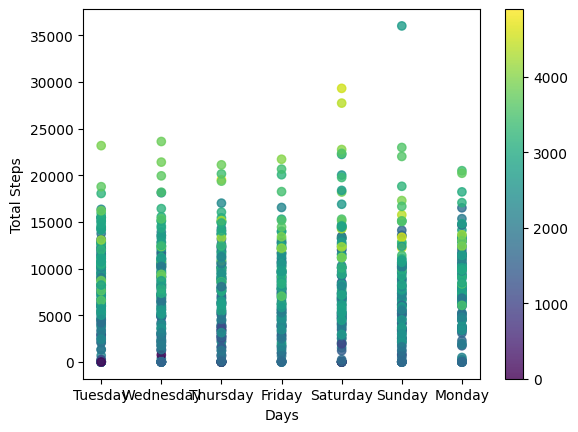

In [495]:
fig, ax = plt.subplots()
plt.scatter(daily_activity['day_of_the_Week'],daily_activity['total_steps'],alpha = 0.8,c=daily_activity['calories'])
ax.set_xlabel('Days')
ax.set_ylabel('Total Steps')
plt.colorbar()
plt.show()

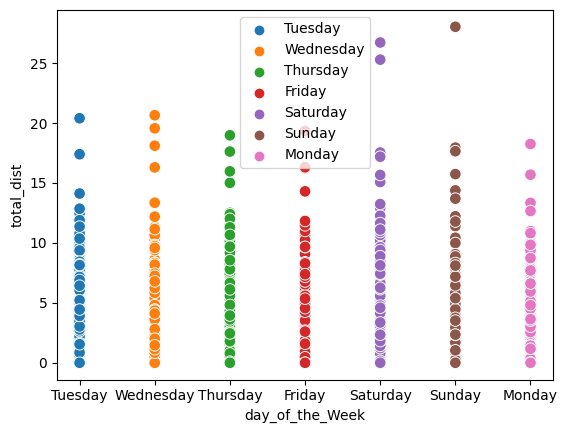

In [496]:
fig, ax = plt.subplots()
sns.scatterplot(x = df_activity.day_of_the_Week, y = df_activity.total_dist,hue=df_activity.day_of_the_Week, s=70)
ax.legend(loc="best")

Sunday has the highest distance covered.

Text(0.5, 1.0, 'Total Steps taken within the different days')

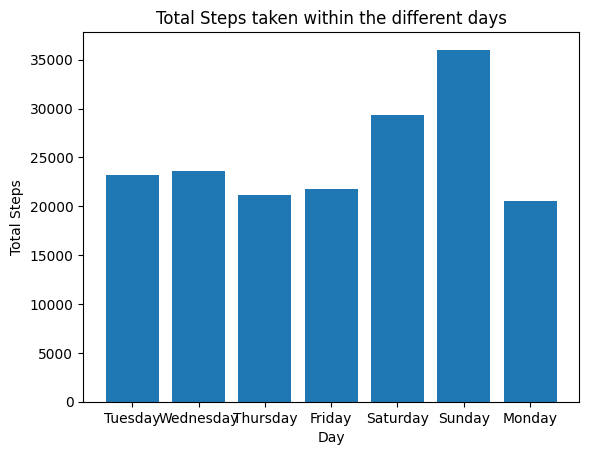

In [497]:
# Bar chart with day of the week against total steps
fig, ax = plt.subplots()
plt.style.use("default")
plt.bar(df_activity['day_of_the_Week'],df_activity['total_steps'])

# Setting the X and Y labels
ax.set_xlabel('Day')
ax.set_ylabel('Total Steps')
ax.set_title("Total Steps taken within the different days")

## Interpretation
According to the plot above, Sunday has the most distance covered while Thursday has the lowest.  
This is shown by both the scatter plot and the bar chart above

Text(0, 0.5, 'Total time asleep(in hours)')

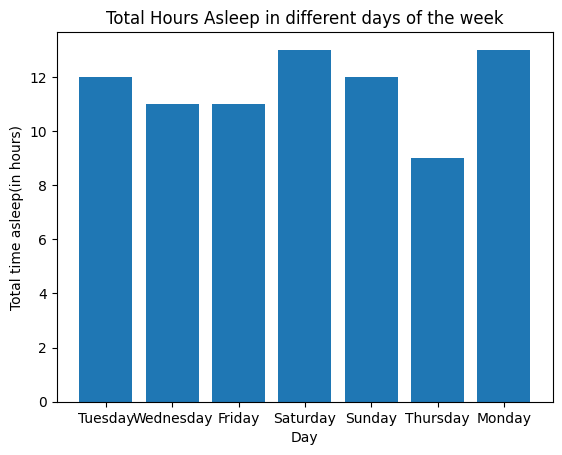

In [498]:
# Bar chart with day of the week against total time in bed
day = sleep_day['day_of_the_Week']
hours = sleep_day['total_hours_asleep']
fig, ax = plt.subplots()
bar_container = ax.bar(day,hours)
ax.set_title("Total Hours Asleep in different days of the week")

# Setting the X and Y labels
ax.set_xlabel('Day')
ax.set_ylabel('Total time asleep(in hours)')



### Findings
Saturday has the highest number of hours asleep.  
Based on [click here](https://www.manifatturafalomo.com/blog/sleep-tips/favorite-day-sleep/#:~:text=Saturday%2C%20the%20Favorite%20Day%20to%20Sleep!&text=As%20many%20as%2090%25%20of,of%20sleep%20more%20than%20usual.) ,All the World loves Saturday! As many as 90% of users sleep more time on Saturday morning, 30 minutes of sleep more than usual.

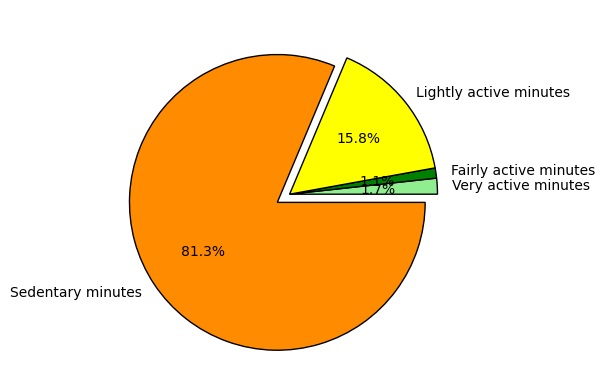

In [499]:
# calculating total of individual distance column
very_active_mins = daily_activity["very_active_mins"].sum()
fairly_active_mins = daily_activity["fairly_active_mins"].sum()
lightly_active_mins = daily_activity["lightly_active_mins"].sum()
sedentary_mins = daily_activity["sedentary_mins"].sum()

# plotting pie chart
slices = [very_active_mins, fairly_active_mins, lightly_active_mins, sedentary_mins]

#Labels
labels = ["Very active minutes", "Fairly active minutes", "Lightly active minutes", "Sedentary minutes"]
#colours of slices
colours = ["lightgreen", "green", "yellow","darkorange"]
explode = [0, 0, 0, 0.1]
plt.style.use("default")
plt.pie(slices, labels = labels,colors = colours, wedgeprops = {"edgecolor": "black"},explode = explode, autopct = "%1.1f%%")
plt.title=("Percentage of Distances")


### Findings and interpretation
1. Sedentary minutes take the biggest percentage of 81.3%. This is not good since Sedentary behaviour refers to activities that use very little energy while being awake.   
These activities exposes the users to health risks.
2. Very active minutes are at 1.7% which means the users are not involving themselves in the required physical activities to enhance the amount of calories burnt.

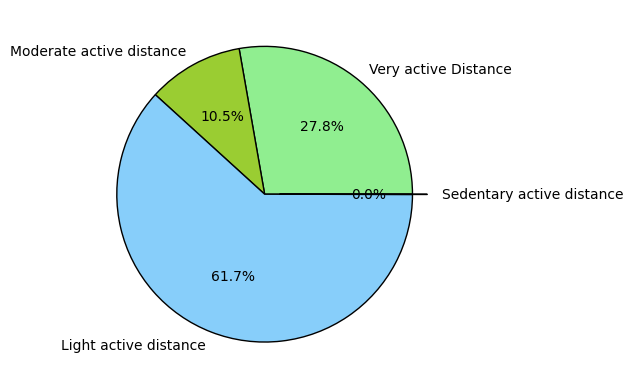

In [500]:
# calculating total of individual distance column
very_active_dist = daily_activity["very_active_dist"].sum()
moderate_active_dist = daily_activity["moderate_active_dist"].sum()
light_active_dist = daily_activity["light_active_dist"].sum()
sedentary_active_dist = daily_activity["sedentary_active_dist"].sum()

# plotting pie chart
slices = [very_active_dist, moderate_active_dist, light_active_dist, sedentary_active_dist]

#Labels
labels = ["Very active Distance", "Moderate active distance", "Light active distance", "Sedentary active distance"]
#colours of slices
colours = ["lightgreen", "yellowgreen", "lightskyblue","darkorange"]
explode = [0, 0, 0, 0.1]
plt.style.use("default")
plt.pie(slices, labels = labels,colors = colours, wedgeprops = {"edgecolor": "black"},explode = explode, autopct = "%1.1f%%")
plt.title=("Percentage of Distances")


The pie chart above show that:  
    
    1. Light Active Distance takes the biggest slice with 61.7%  
    2.According to  [here](https://www.medicinenet.com/how_many_steps_a_day_is_considered_active/article.htm) sedentary active distances are Less than 5,000 steps daily. It hold the lowest percentage in the pie chart at 0.0% meaning participants achieve over 5,000 steps daily.

<Axes: xlabel='day_of_the_Week', ylabel='Count'>

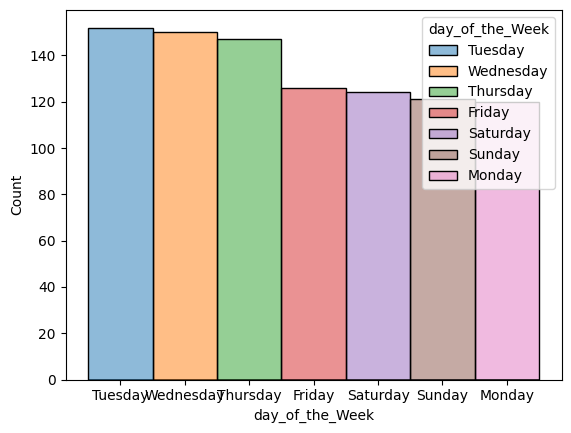

In [501]:
sns.histplot(x='day_of_the_Week',data=df_activity,kde=True,hue='day_of_the_Week')

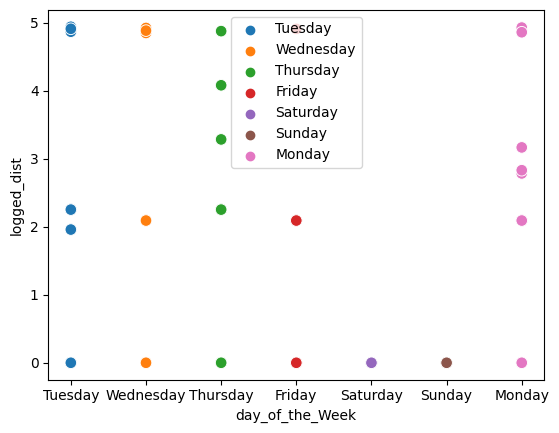

In [502]:
fig, ax = plt.subplots()
sns.scatterplot(x = daily_activity.day_of_the_Week, y = daily_activity.logged_dist,hue=daily_activity.day_of_the_Week, s=70)
ax.legend(loc="best")

This shows that most users do not log in their smart devices when they go about their daily activities.

### Interpretation
Tuesday is the day which has the highest activity while Monday has the lowest activity.  
Monday has the lowest activity since On Monday, people are generally sluggish, and recovering from lack of sleep or overindulgences during the weekend.  
All of that leads to a more energetic and excited psyche to wake up Tuesday morning, and your will to work out is at its highest of the week.

# 6. Act
1. **What are some trends in smart device usage?**  
* Most users (61.7%) achieve the light active distance. This means they involve themselves in Light intensity activities require the least amount of effort, compared to moderate and vigorous activities which is not  beneficial to their health.  
* Tuesday is the day which users are mostly active.
* Sedentary minutes take the biggest percentage of 81.3%. This is not good since Sedentary behaviour refers to activities that use very little energy while being awake. Examples of sedentary behaviour include:
1. sitting for long periods
2.  watching television
3.  riding in a bus or car
4.  playing passive video games
5.  playing on the computer and
6. sitting in a car seat or stroller.   
According to [click here]((https:(https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7700832/#:~:text=Some%20examples%20of%20sedentary%20behavior,Figure%201) these sedentary activities exposes the users to a lot of health risks.  
* Monday and Saturday are the days with the most hours asleep.  
* The average steps covered by most users is 7637 as compared to the recommended 10,000.  
* Users are more active on weekdays than on the weekends.  
* According to the logged activities distance, most users do not log in the app while working out.                                   

2. **How could these trends apply to Bellabeat customers?**  
These companies both focus on women health, the trends can help bellabeat make more informed decisions for their customers.  
The trends can help bellabeat customers change their routines and be well informed on how to use the bellabeat products for thei health benefits.  

3. **How could these trends help influence Bellabeat marketing strategy?**  
Bellabeat can use this trend to find the weaknesses that the users face regarding the exercising, find solutions and educate them on the importance of exercising.  
To educate the users more on how the different bellabeat products work since most of them seem not to know how they work.                                  
                                  

## Recommendations
* Documentation of the users information such as weight, height etc. will help in more efficient analysis in future so as to make more informed decisions. Ensuring the privacy of their data would make the users be more open in letting their data be used for analysis.  
* According to my research, Your step count on your Fitbit may be one indicator of your activity, but Fitbit active minutes are an even better indicator of daily activity than steps. Therefore encouraging the users to focus more on Fitbit active minutes.  
* Making the products easy to use since most of them seem not to know how to use them and setting reminders for their next activities. This would definitely increase the products usage.  
* Suggesting the type of exercises the users should involve themselves in would increase the smart device usage.

>> # **Conclusion based on our analysis:**

---



1. Sedentary make up a significant portion, 81% of users daily active minutes. Users spend on avg 12 hours a day in sedentary minutes, 4 hours lightly active, and only half-hour in fairly+very active!


2. We see the most change on Saturday: users take more steps, burn more calories, and spend less time sedentary. Sunday is the most "lazy" day for users.


3. 54% of the users who recorded their sleep data spent 55 minutes awake in bed before falling asleep.


4. Users takes the most steps from 5 PM to 7 PM Users who are sedentary take minimal steps and burn 1500 to 2500 calories compared to users who are more active, take more steps, but still burn similar calories.

  

  

>> # **Marketing recommendations to expand globally:**

---



> * Obtain more data for an accurate analysis, encouraging users to use a wifi-connected scale instead of manual weight entries.

> * ducational healthy style campaign encourages users to have short active exercises during the week, longer during the weekends, especially on Sunday where we see the lowest steps and most sedentary minutes.

> * Educational healthy style campaign can pair with a point-award incentive system. Users completing the whole week's exercise will receive Bellabeat points on products/memberships.

> * The product, such as Leaf wellness tracker, can beat or vibrate after a prolonged period of sedentary minutes, signaling the user it's time to get active! Similarly, it can also remind the user it's time to sleep after sensing a prolonged awake time in bed.